In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
sns.set_style('whitegrid')

In [25]:
train = pd.read_csv('data/train_NIR5Yl1.csv', index_col='ID')
print('Train Data Size :',train.shape)
train.head()

Train Data Size : (330045, 6)


,Tag,Reputation,Answers,Username,Views,Upvotes
ID,,,,,,
52664,a,3942.0,2.0,155623,7855.0,42.0
327662,a,26046.0,12.0,21781,55801.0,1175.0
468453,c,1358.0,4.0,56177,8067.0,60.0
96996,a,264.0,3.0,168793,27064.0,9.0
131465,c,4271.0,4.0,112223,13986.0,83.0


In [26]:
test = pd.read_csv('data/test_8i3B3FC.csv', index_col='ID')
print('Test Data Size :',test.shape)
test.head()

Test Data Size : (141448, 5)


,Tag,Reputation,Answers,Username,Views
ID,,,,,
366953,a,5645.0,3.0,50652,33200.0
71864,c,24511.0,6.0,37685,2730.0
141692,i,927.0,1.0,135293,21167.0
316833,i,21.0,6.0,166998,18528.0
440445,i,4475.0,10.0,53504,57240.0


In [27]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330045 entries, 52664 to 300553
Data columns (total 6 columns):
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 17.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141448 entries, 366953 to 107271
Data columns (total 5 columns):
Tag           141448 non-null object
Reputation    141448 non-null float64
Answers       141448 non-null float64
Username      141448 non-null int64
Views         141448 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.5+ MB


(None, None)

In [28]:
train.Tag = train.Tag.astype('category')
test.Tag = test.Tag.astype('category')

train.Username = train.Username.astype('category')
test.Username = test.Username.astype('category')

train.Reputation = train.Reputation.astype(int)
test.Reputation = test.Reputation.astype(int)

train.Answers = train.Answers.astype(int)
test.Answers = test.Answers.astype(int)

train.Views = train.Views.astype(int)
test.Views = test.Views.astype(int)


train.Upvotes = train.Upvotes.astype(int)

In [29]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330045 entries, 52664 to 300553
Data columns (total 6 columns):
Tag           330045 non-null category
Reputation    330045 non-null int32
Answers       330045 non-null int32
Username      330045 non-null category
Views         330045 non-null int32
Upvotes       330045 non-null int32
dtypes: category(2), int32(4)
memory usage: 15.2 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 141448 entries, 366953 to 107271
Data columns (total 5 columns):
Tag           141448 non-null category
Reputation    141448 non-null int32
Answers       141448 non-null int32
Username      141448 non-null category
Views         141448 non-null int32
dtypes: category(2), int32(3)
memory usage: 6.5 MB


(None, None)

In [30]:
# train.groupby('Tag').describe().T

##  Finding Outliers in Views Columns

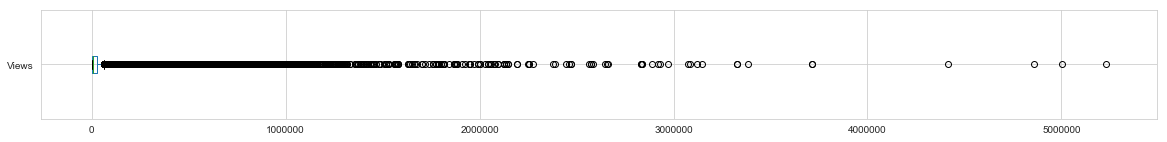

In [31]:
train.boxplot(vert=False, column='Views', figsize=(20,2))
# train.Views.plot(kind='box')
# sns.boxplot(x='Views', data=train, hue='Tag')

In [32]:
print('View Count > 4L :', train.Views[train.Views>400000].count())
print('Min Outlier :', train.Views[train.Views>400000].min())
print('Min Outlier :', train.Views[train.Views<400000].max())

print('View Count > 5L :', train.Views[train.Views>500000].count())
print('Min Outlier :', train.Views[train.Views>500000].min())
print('Min Outlier :', train.Views[train.Views<500000].max())

View Count > 4L : 2152
Min Outlier : 400023
Min Outlier : 399936
View Count > 5L : 1379
Min Outlier : 500125
Min Outlier : 499595


In [34]:
ok_std = 5 * np.abs(train.Views.std())
mask_ok_range = np.abs(train.Views - train.Views.mean()) <= ok_std
outliers = train[~ mask_ok_range]
print('Count :', outliers.Views.count())
print('Min Outlier :', outliers.Views.min())

Count : 1850
Min Outlier : 434703


Outliers Count : 3301


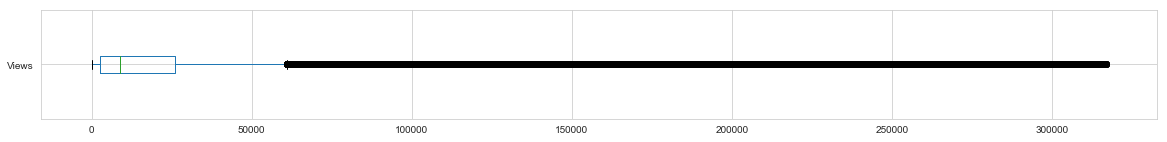

In [65]:
# This isn't the right way to remove outliers. Why? Becacuse there is always that top 1% right??
q = train.Views.quantile(0.99)
t = train[train.Views < q]
print('Outliers Count :', (train.Views.count() - t.Views.count()))
t.boxplot(vert=False, column='Views', figsize=(20,2))

In [37]:
outliers_views = train[train.Views>500000]
outliers_views.shape

(1379, 6)

## Is there bad data where, Upvotes > Views???

In [38]:
# Objective: Are there rows where Upvotes > Views??
upvotes_gt_views = train[train.Upvotes > train.Views]
print('Bad Data Count (Upvotes greater than Views) :', upvotes_gt_views.shape)
upvotes_gt_views.groupby('Tag').count()

Bad Data Count (Upvotes greater than Views) : (89, 6)


,Reputation,Answers,Username,Views,Upvotes
Tag,,,,,
a,13,13,13,13,13
c,16,16,16,16,16
h,9,9,9,9,9
i,1,1,1,1,1
j,22,22,22,22,22
o,0,0,0,0,0
p,8,8,8,8,8
r,1,1,1,1,1
s,17,17,17,17,17


In [21]:
# Objective : Remove bad data found in earlier step
# train = train.loc[~ train.index.isin(bad_data.index)]
# train.count()

##  Finding Outliers in Answers Column

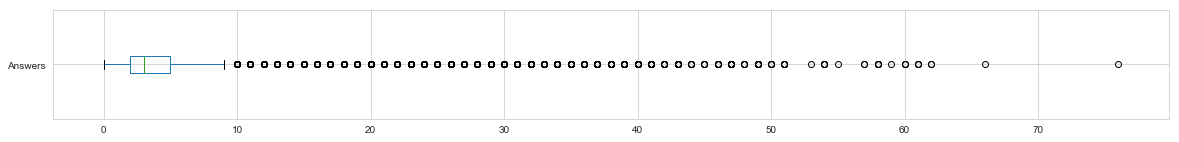

In [41]:
train.boxplot(vert=False, column='Answers', figsize=(20,2))

In [45]:
print('Max of Answers :', train.Answers.max())
print('Answers Count > 70 :', train.Answers[train.Answers>70].count())
print('Min Value after cut-off :', train.Answers[train.Answers>70].min())
print('Max Value before cut-off :', train.Answers[train.Answers<70].max())

Max of Answers : 76
Answers Count > 70 : 1
Min Value after cut-off : 76
Max Value before cut-off : 66


In [46]:
outliers_answers = train[train.Answers>70]
outliers_answers.shape

(1, 6)

##  Finding Outliers in Reputation Column

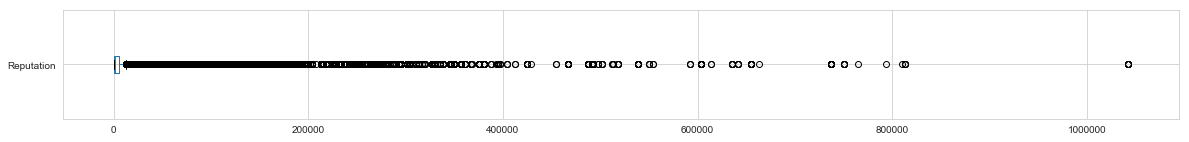

In [47]:
train.boxplot(vert=False, column='Reputation', figsize=(20,2))

In [50]:
cutoff=1000000
print('Max of Reputation :', train.Reputation.max())
print('Answers Count > {} :'.format(cutoff), train.Reputation[train.Reputation>cutoff].count())
print('Min Value after cut-off :', train.Reputation[train.Reputation>cutoff].min())
print('Max Value before cut-off :', train.Reputation[train.Reputation<cutoff].max())

Max of Reputation : 1042428
Answers Count > 1000000 : 6
Min Value after cut-off : 1042428
Max Value before cut-off : 813374


In [53]:
outliers_reputation = train[train.Reputation>cutoff]
outliers_reputation.shape

(6, 6)

## Removing Outliers

In [61]:
train = train[ 
    (~train.index.isin(upvotes_gt_views.index)) & 
    (~train.index.isin(outliers_answers.index)) &
    (~train.index.isin(outliers_reputation.index)) &
    (~train.index.isin(outliers_views.index))
]
train.shape[0] # 328571

328571

## Box-plot of all features in one fig

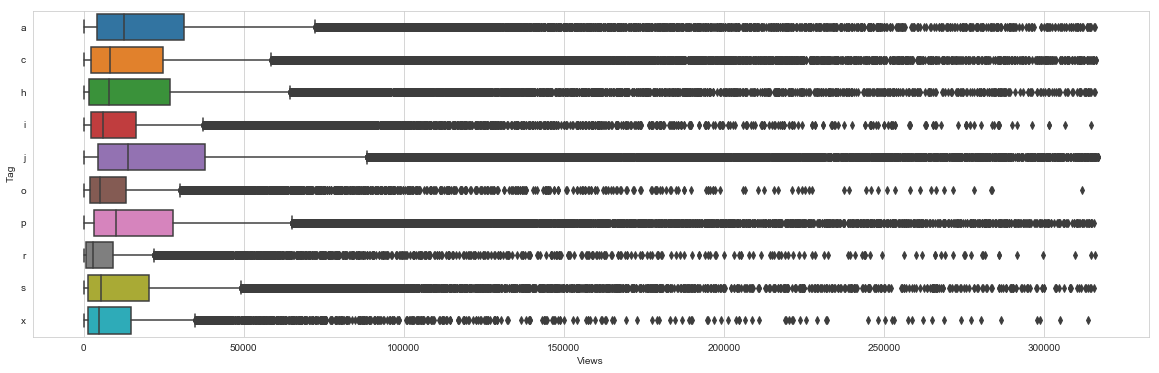

In [70]:
fig, ax = plt.subplots(figsize=(20,6)) # To change the size of seaborn boxplot
sns.boxplot(x=train.Views, y=train.Tag, ax=ax)

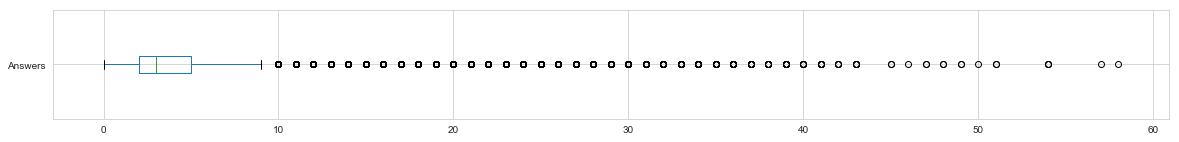

In [71]:
train.boxplot(vert=False, column='Answers', figsize=(20,2))

In [73]:
train.to_csv('data/preprocessed/train.csv')